<a href="https://colab.research.google.com/github/kcarnold/cs344/blob/main/src/A_Batch_of_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uq fastbook

     |████████████████████████████████| 727kB 8.6MB/s 
     |████████████████████████████████| 1.2MB 15.4MB/s 
     |████████████████████████████████| 194kB 28.0MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 


# Preamble

In [2]:
from fastai.vision.all import *

In [ ]:
# Make one-channel images display in greyscale.
# See https://forums.fast.ai/t/show-image-displays-color-image-for-mnist-sample-dataset/78932/4
matplotlib.rc('image', cmap='Greys')

In [3]:
path = untar_data(URLs.PETS) / "images"
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

In [4]:
image_files = get_image_files(path)
image_files

(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_71.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_88.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_112.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_66.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_114.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_102.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_132.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_111.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_259.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_69.jpg')...]

Make a stable order for the images: first sort, then randomize using a known seed.

In [73]:
image_files.sort()
set_seed(42)
image_files.shuffle()

(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_64.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_21.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_143.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_86.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_85.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_17.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_64.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_182.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_194.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_218.jpg')...]

# Splitting

In [74]:
splitter = RandomSplitter(valid_pct=0.2, seed=42)

## Datasets, DataBlocks, and DataLoaders

In [75]:
def cat_or_dog(x): return 'cat' if x[0].isupper() else 'dog'

In [76]:
filename = path / "Sphynx_250.jpg"
filename

Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_250.jpg')

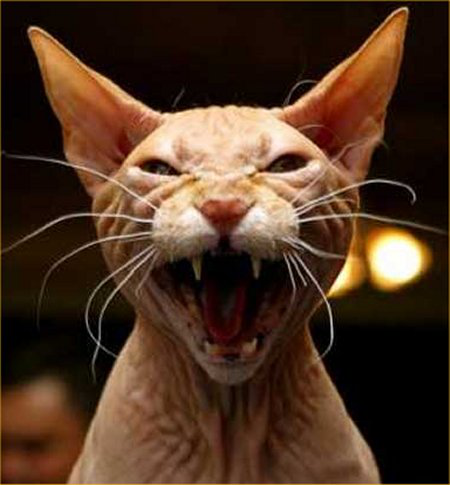

In [77]:
img = PILImage.create(filename); img

In [78]:
def get_y(file_path):
    return cat_or_dog(file_path.name)
get_y(filename)

'cat'

In [79]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_y     = get_y,
                   splitter  = splitter,
                   item_tfms = Resize(224))

In [86]:
# override shuffle_fn so that the images never actually get shuffled (batch order is consistent)
dataloaders = dblock.dataloaders(image_files, batch_size=9, shuffle_fn=lambda idxs: idxs)

In [87]:
dataloaders.train.n

5912

# What does a batch of images look like?

In [88]:
#set_seed(0)
batch = dataloaders.train.one_batch()
images, labels = batch

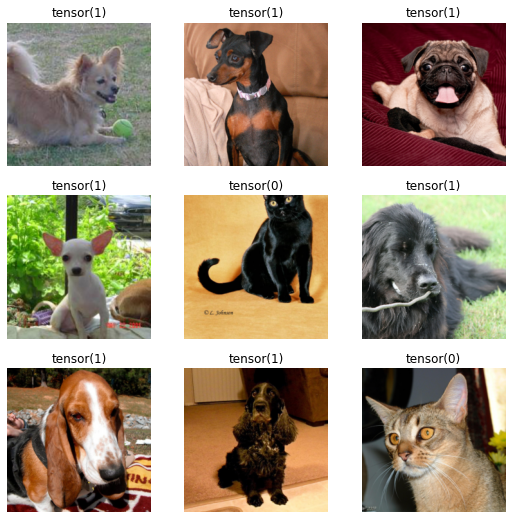

In [89]:
show_image_batch((images, labels))

In [91]:
images.shape

(9, 3, 224, 224)

In [134]:
labels

TensorCategory([1, 1, 1, 1, 0, 1, 1, 1, 0])

In [172]:
vocab = dataloaders.train.vocab
vocab[0], vocab[1]

('cat', 'dog')

In [173]:
#dataloaders.train.decode_batch((images, labels))

In [169]:
dataloaders.train.vocab[0]

'cat'

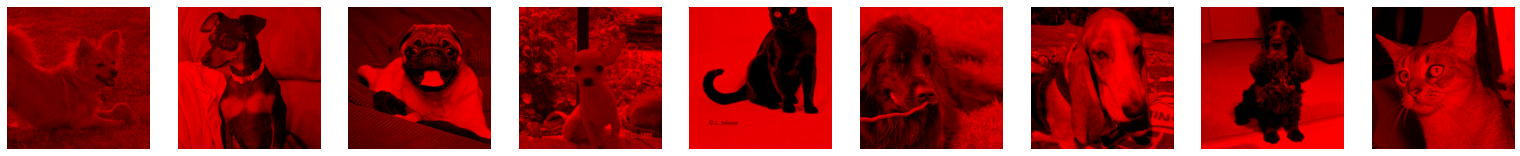

In [187]:
show_images(images * (torch.Tensor([1, 0, 0])[None, :, None, None]))

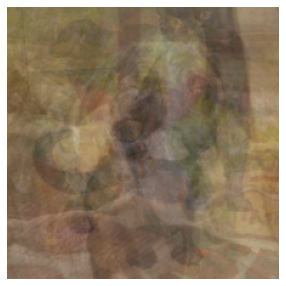

In [94]:
show_image(images.mean(dim=0))

In [97]:
images.mean(dim=1, keepdim=True).shape

(9, 1, 224, 224)

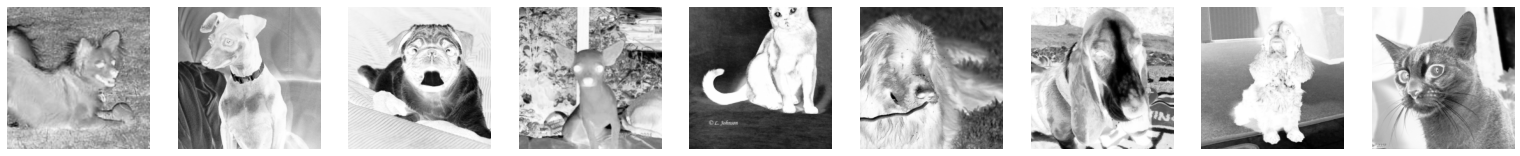

In [100]:
show_images(images.mean(dim=1))

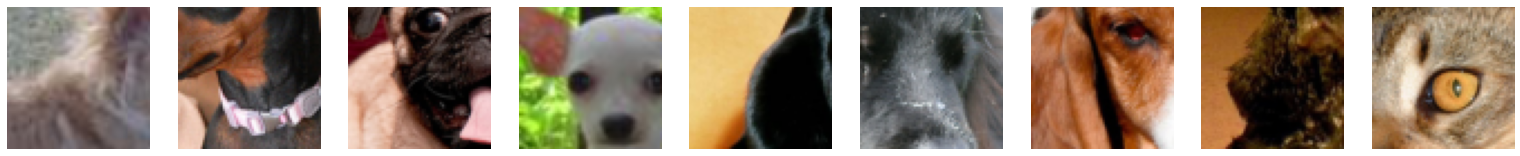

In [103]:
show_images(images[:,:,64:128, 64:128])

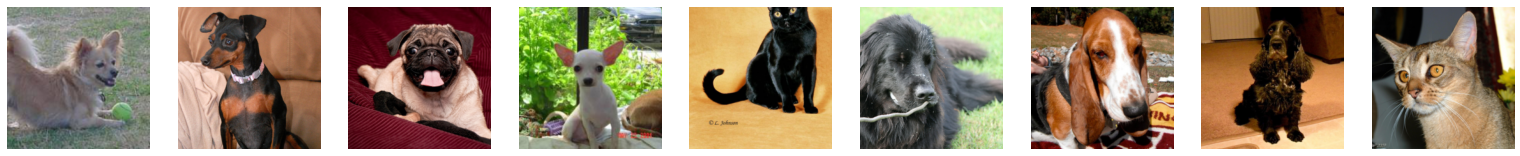

In [117]:
show_images(RandomResizedCrop(64)(images))

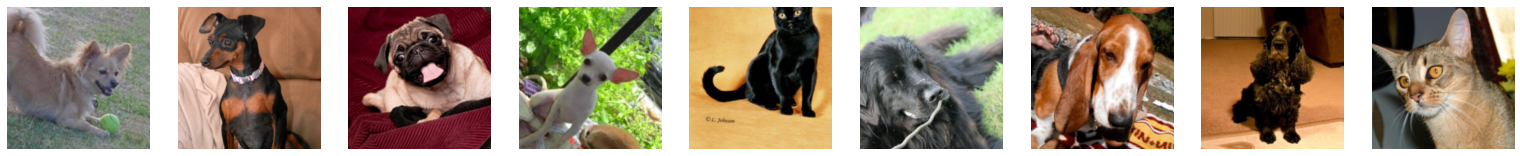

In [119]:
show_images(Rotate(max_deg=50, p=1.0)(images))

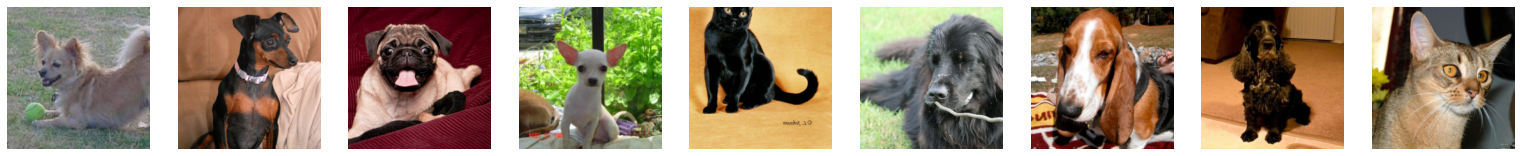

In [120]:
show_images(Flip(p=1.0)(images))

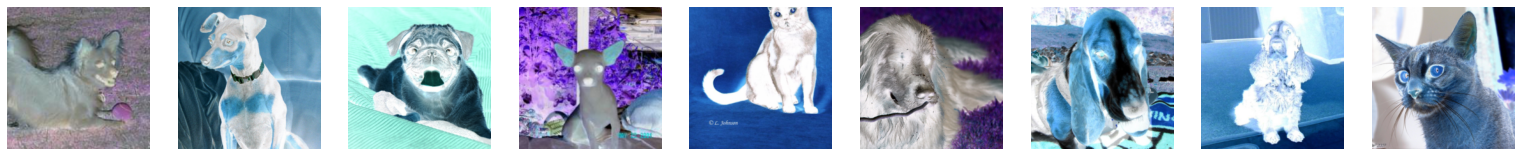

In [133]:
show_images(1-images)

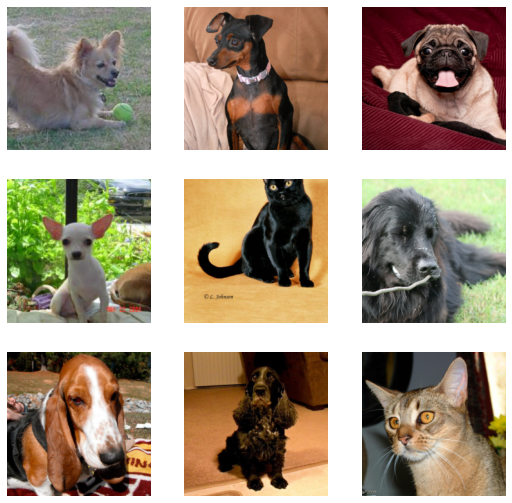

In [131]:
show_images(Contrast(max_lighting=0.9, p=1.0)(images), nrows = 3)

# Data Augmentation

In [ ]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_y     = lambda filename: cat_or_dog(filename.name),
                   splitter  = splitter,
                   item_tfms = Resize(128),
                   batch_tfms= aug_transforms())
dblock.summary(image_files)
my_dataloaders = dblock.dataloaders(image_files, batch_size=8)

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Sphynx_99.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x388
  Pipeline: <lambda> -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Sphynx_99.jpg
    applying <lambda> gives
      cat
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=500x388, TensorCategory(0))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: R

In [ ]:
batch = my_dataloaders.one_batch()
images, labels = batch
images.shape

(8, 3, 128, 128)

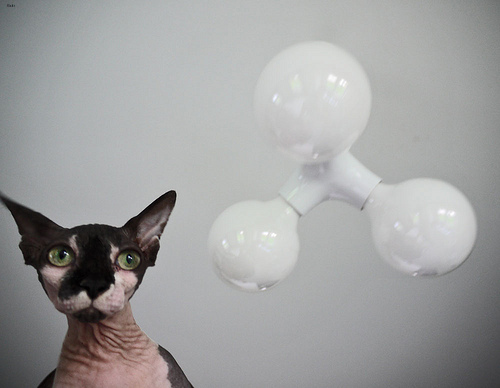

In [ ]:
my_dataloaders.train.dataset[0][0]

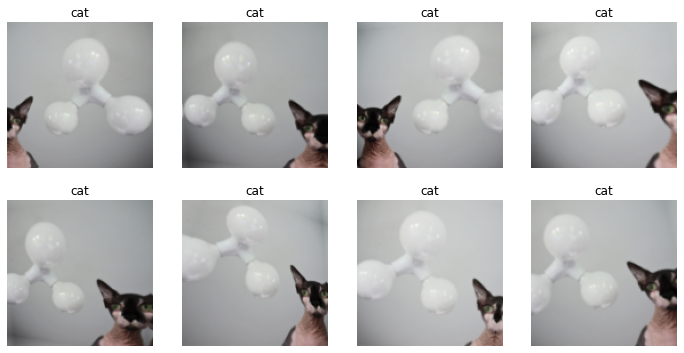

In [ ]:
my_dataloaders.train.show_batch(unique=True)